# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Traffic Sign Recognition Classifier

The aim of this project is to build a traffic signal classifier trained using german traffic signal dataset.

The steps of this project are the following:

0. Load the data set. 
1. Explore, summarize and visualize the data set.
2. Design, train and test a model architecture.
3. Use the model to make predictions on new images.
4. Analyze the softmax probabilities of the new images.
5. Summarize the results with a written report.


---
## Step 1: Load The Data
The data is loaded using pickle library. Three seperate pickle files are loaded. One each for training,Validation and testing.

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [2]:
import numpy as np
img_size = train['sizes']
n_classes = np.unique(y_train)
size_img = train['sizes']




---

## Step 2: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np
import pandas as pd


# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of Validation examples.
n_valid = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Training Data Histogram Visualization

<Container object of 43 artists>

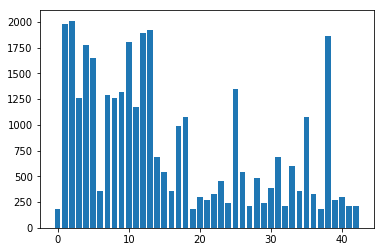

In [52]:
counts = []
for i in range(43):
    counts.append(np.sum(y_train == i))

plt.bar(range(43),counts)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [41]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_random_3C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot])
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()
    
    
def get_imgs_of_type(image_type,num_of_img,Y):
    img_ind = []
    for i in range(len(Y)):
        if Y[i] == image_type:
            if len(img_ind) == num_of_img:
                return img_ind
            else:
                img_ind.append(i)
                
    return img_ind;

def plot_class_of_Images_3C(image_type,n_row,n_col,X,Y):
    
    numOfImg = n_row*n_col
    img_ind = get_imgs_of_type(image_type,numOfImg,Y)
    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(len(img_ind)):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #ind_plot = np.random.randint(1,len(y))
        #print(i)
        img_num = img_ind[i]
        plt.imshow(X[img_num])
        plt.axis('off')
    plt.show()


### Randomly Visualize the training dataset of different class

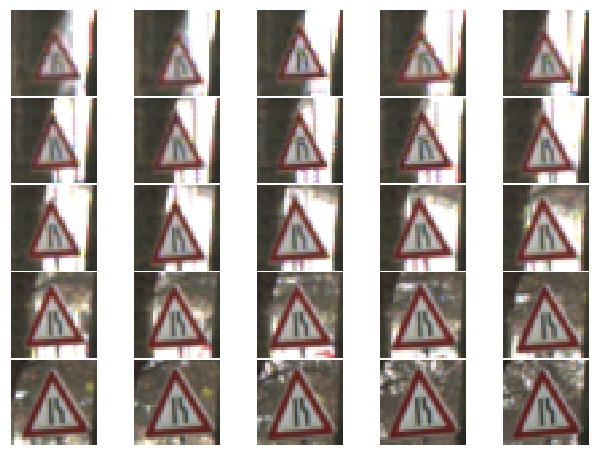

In [42]:
plot_class_of_Images_3C(24,5,5,X_train,y_train)

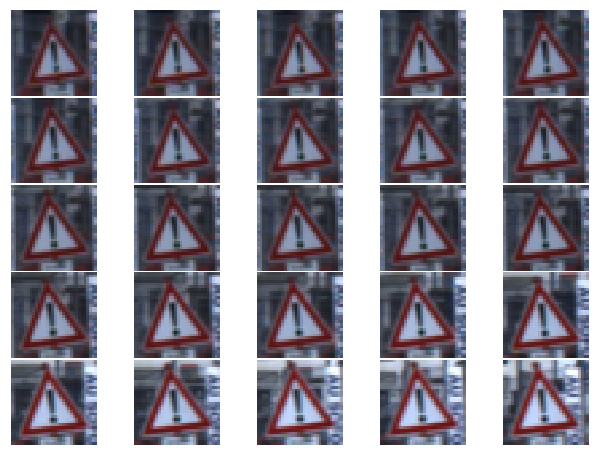

In [43]:
plot_class_of_Images_3C(18,5,5,X_train,y_train)

----

## Step 3: Design and Test a Model Architecture


### Pre-process the Data Set (normalization, grayscale, etc.)

I used following steps to preprocess image before training.
1. Histogram Equalization of Y channel, by converting RGB image to YCrCb format.
2. Normalization of image to convert it to range 0 to 1.


In [5]:
def pre_process_image(image):
    processed_img = np.empty(shape=image.shape,dtype=np.float32)
    processed_img = cv2.cvtColor(image,cv2.COLOR_RGB2YCR_CB)
    processed_img[:,:,0] = cv2.equalizeHist(processed_img[:,:,0])
    processed_img = cv2.cvtColor(processed_img,cv2.COLOR_YCR_CB2RGB)
    processed_img = processed_img/255.
    return processed_img
    


### Data Augmentation

For each image in training dataset, I augment two more images.
1. Randomly rotate image between 1 to 30 degrees.
2. Randomly augment brightness.
3. Randomly translate image in x and Y direction.

In [6]:
def augment_brightness(img):
    processed_img = np.empty(shape=img.shape,dtype=np.float32)
    processed_img = cv2.cvtColor(img,cv2.COLOR_RGB2YCR_CB)
    random_num = np.random.uniform(0.5,1)
    processed_img[:,:,0] = img[:,:,0]*random_num
    img = cv2.cvtColor(processed_img,cv2.COLOR_YCR_CB2RGB)
    return img



def augment_data(X,Y,augmentationFactor):

    numOfImg,height,width,channels = X.shape
    X_augmented = np.empty(shape=[numOfImg*augmentationFactor,height,width,channels],dtype=np.float32)
    Y_augmented = np.empty(shape=[numOfImg*augmentationFactor],dtype=np.uint8)
    for i in range(numOfImg):
        image = pre_process_image(X[i])
        label = Y[i]
        X_augmented[i*augmentationFactor] = image
        #print("copying original image to location :",i*augmentationFactor)
        Y_augmented[i*augmentationFactor] = Y[i]
        for j in range(augmentationFactor-1):
                transformed_img = np.float32(image.shape)
                rot_ang =  np.random.randint(1,30)
                rot_M = cv2.getRotationMatrix2D((width/2,height/2),rot_ang,1)
                #rotate image
                transformed_img = cv2.warpAffine(image,rot_M,(width,height))
                
                # augment brightness
                transformed_img = augment_brightness(transformed_img.astype(np.float32))
                
                #translate image
                x_trans =  np.random.randint(0,5)
                y_trans =  np.random.randint(0,5)
                trans_M = np.float32([[1,0,x_trans],[0,1,y_trans]])
                transformed_img = cv2.warpAffine(transformed_img,trans_M,(width,height))
                #print("copying image to location :",i*augmentationFactor + j + 1)
                X_augmented[i*augmentationFactor + j + 1] = transformed_img
                Y_augmented[i*augmentationFactor + j + 1] = label
                
    
    return X_augmented,Y_augmented
                


In [7]:

augmented_image,augmented_label = augment_data(X_train,y_train,3)



### Visualization of Augmented Data

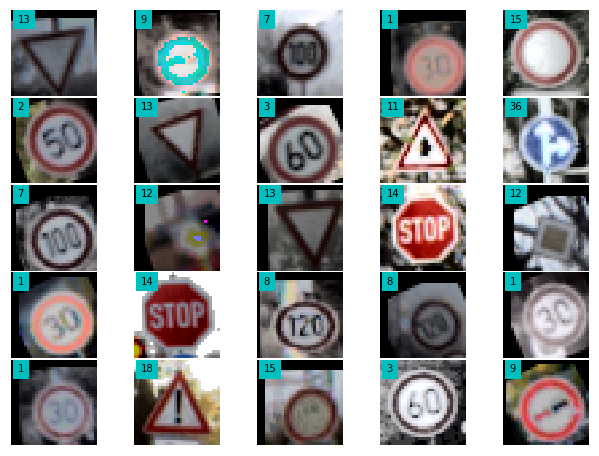

In [8]:
plot_random_3C(5,5,augmented_image,augmented_label)

### Gray Scale Conversion

After augmenting data, I converted all images to grayscale.

In [9]:
def get_GrayScale_Image(img):
    gray_img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_RGB2GRAY)
    return gray_img


In [10]:
def preprocessBatch(imageBatch):
    numOfImg,height,width,channels = imageBatch.shape
    grayArray = np.empty(imageBatch[:,:,:,0].shape)
       
    for i in range(numOfImg):
        image = imageBatch[i]
        img_height,img_width,channels = image.shape
        grayImage = np.empty([img_height,img_width,1],dtype=np.float32)

        grayImage = get_GrayScale_Image(image)   
        grayArray[i] = grayImage    
    
    return grayArray


In [11]:
# Preprocess Training Images

numOfTrgImg,height,width,channels = augmented_image.shape

gray_X_train = np.empty([numOfTrgImg,height,width,1],dtype=np.float32)
gray_X_train[:,:,:,0] = preprocessBatch(augmented_image)
print("Shape of image batch before preprocessing:",augmented_image.shape)
print("Preprocessing complete for training images." )
print("Shape of image batch before preprocessing:",gray_X_train.shape)

Shape of image batch before preprocessing: (104397, 32, 32, 3)
Preprocessing complete for training images.
Shape of image batch before preprocessing: (104397, 32, 32, 1)


In [12]:
# Preprocess Validity images
# augmented_valid_image,augmented_valid_label = augment_data(X_valid,y_valid,3)
# numOfValidImg,height,width,channels = augmented_valid_image.shape
# gray_X_valid = np.empty([numOfValidImg,height,width,1],dtype=np.float32)
# gray_X_valid[:,:,:,0] = preprocessBatch(augmented_valid_image)

preprocessed_X_valid = np.empty(shape=X_valid.shape,dtype=np.float32)

numOfValidImg,height,width,channels = X_valid.shape
gray_X_valid = np.empty([numOfValidImg,height,width,1],dtype=np.float32)

for i in range(numOfValidImg):
       preprocessed_X_valid[i,:,:,:] =   pre_process_image(X_valid[i])
        
        
gray_X_valid[:,:,:,0]= preprocessBatch(preprocessed_X_valid)

print("Shape of Validity image batch before preprocessing:",X_valid.shape)
print("Preprocessing complete for Validity images." )
print("Shape of Validity image batch after preprocessing:",gray_X_valid.shape)

Shape of Validity image batch before preprocessing: (4410, 32, 32, 3)
Preprocessing complete for Validity images.
Shape of Validity image batch after preprocessing: (4410, 32, 32, 1)


In [13]:
# Preprocess Test images
preprocessed_X_test = np.empty(shape=X_test.shape,dtype=np.float32)

numOfTestImg,height,width,channels = X_test.shape
gray_X_test = np.empty([numOfTestImg,height,width,1],dtype=np.float32)

for i in range(numOfTestImg):
       preprocessed_X_test[i,:,:,:] =   pre_process_image(X_test[i])
        
gray_X_test[:,:,:,0]= preprocessBatch(preprocessed_X_test)

print("Shape of Test image batch before preprocessing:",X_test.shape)
print("Preprocessing complete for Test images." )
print("Shape of test image batch after preprocessing:",gray_X_test.shape)

Shape of Test image batch before preprocessing: (12630, 32, 32, 3)
Preprocessing complete for Test images.
Shape of test image batch after preprocessing: (12630, 32, 32, 1)


### Visualization of GrayScale Image

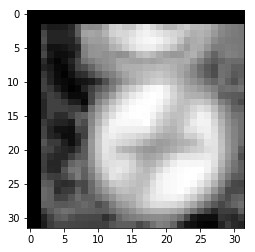

In [44]:

plt.imshow(gray_X_train[2,:,:,0],cmap="gray")

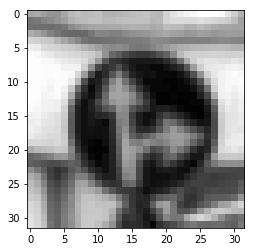

In [47]:
plt.imshow(gray_X_train[3456,:,:,0],cmap="gray")

In [15]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [16]:
def conv_layer(input,num_of_input_channel,filter_shape,output_depth,max_pooling='true'):
    mu = 0
    sigma = 0.1
    filter_shape = [filter_shape,filter_shape,num_of_input_channel,output_depth]
    conv_W = tf.Variable(tf.truncated_normal(shape=filter_shape, mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(output_depth))
    cnv_layer   = tf.nn.conv2d(input=input, filter=conv_W, strides=[1, 1, 1, 1], padding='VALID') + conv_b
    
    # RELU for Activation.
    cnv_layer = tf.nn.relu(cnv_layer)
    
    if max_pooling == 'true':
        #Pooling
        cnv_layer = tf.nn.max_pool(cnv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    return cnv_layer
    
def dropout_layer(layer, keep_prob):
    layer_drop = tf.nn.dropout(layer, keep_prob)
    return layer_drop 
 


    

In [17]:
def full_connection_layer(input,num_of_input,num_of_output,activation = 1):
    mu = 0
    sigma = 0.1
    shape = [num_of_input,num_of_output]
    fc_W = tf.Variable(tf.truncated_normal(shape=shape, mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(num_of_output))
    fc   = tf.matmul(input, fc_W) + fc_b
    
    # RELU for Activation.
    if activation == 1 :
        fc = tf.nn.relu(fc)
    
    return fc
    

## Model Architecture

I started with a very basic architecture, having only two convolution layer with maxpooling and three full connection layer. The model is defined in procedure LeNet(). 

With this architecture, my training accuracy was in range of 93% and validity accuracy was in range of 90%. While the testing accuracy was further low. This gave me impression that I am overfitting model. 

I then,added a few dropout layers in the model(defined in procedure LeNet1()). But this time the training accuracy as well as validity accuracy fall drastically. It was in range of 75%.

I then added 2 more convolution layers(defined in procedure LeNet2() and LeNet3()) and two more dropout layers to avoid overfitting.

My Final Architecture is as follows:

The model has 8 layers.
1. Layer 1: Conv layer with 16 filters of size 5x5. Followed by relu activation. 
2. Layer 2: Conv layer with 32 filters of size 5x5. Followed by relu activation. 
3. Layer 3: Conv layer with 64 filters of size 5x5. Followed by relu activation and a dropout layer. 
4. Layer 4: Conv layer with 128 filters of size 5x5. Followed by relu activation and a dropout layer and a max_pool layer of size 2x2.. 
5. Layer 5: Fully connected layer with 8192 neurons. This is followed by relu activation layer.
6. Layer 6: Fully connected layer with 1024 neurons. This is followed by relu activation layer.
7. Layer 7: Fully connected layer with 256 neurons. This is followed by relu activation layer.
8. Layer 8: Finally Fully connected layer with with 43 outputs.



In [18]:
def LeNet(x):
    # Layer 1. Convolutional. Input = 32x32x1. Output = 14x14x6
    cnv_layer_1 = conv_layer(x,1,5,6)
    # Layer 2 Convolutional. Input = 14x14x6. Output = 5x5x16
    cnv_layer_2 = conv_layer(cnv_layer_1,6,5,16)
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc_1 = flatten(cnv_layer_2)
    fc_1 = full_connection_layer(fc_1,400,120)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc_2 = full_connection_layer(fc_1,120,84)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc_3 = full_connection_layer(fc_2,84,43,activation=0)
    return fc_3

In [19]:
def LeNet1(x,keep_prob):
    # Layer 1. Convolutional. Input = 32x32x1. Output = 14x14x6
    cnv_layer_1 = conv_layer(x,1,5,6)
    drop_layer_1 = dropout_layer(cnv_layer_1, keep_prob)
    # Layer 2 Convolutional. Input = 14x14x6. Output = 5x5x16
    cnv_layer_2 = conv_layer(drop_layer_1,6,5,16)
    drop_layer_2 = dropout_layer(cnv_layer_2, keep_prob)
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc_1 = flatten(drop_layer_2)
    fc_1 = full_connection_layer(fc_1,400,120)
    drop_layer_3 = dropout_layer(fc_1, keep_prob)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc_2 = full_connection_layer(drop_layer_3,120,84,activation=1)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    drop_layer_4 = dropout_layer(fc_2, keep_prob)
    fc_3 = full_connection_layer(drop_layer_4,84,43,activation=0)
    return fc_3

In [20]:
def LeNet2(x,keep_prob):
    # Layer 1. Convolutional. Input = 32x32x1. Output = 14x14x6
    cnv_layer_1 = conv_layer(x,1,5,16)
    
    # Layer 2 Convolutional. Input = 14x14x6. Output = 5x5x16
    cnv_layer_2 = conv_layer(cnv_layer_1,16,5,32)
    drop_layer_2 = dropout_layer(cnv_layer_2, keep_prob)
    
    
    # Layer 3 Convolutional. Input = 14x14x6. Output = 5x5x16
    cnv_layer_3 = conv_layer(drop_layer_2,32,5,64)
    drop_layer_3 = dropout_layer(cnv_layer_3, keep_prob)
    
    # Layer 4 Convolutional. Input = 14x14x6. Output = 5x5x16
    cnv_layer_4 = conv_layer(drop_layer_3,32,5,128)
    drop_layer_4 = dropout_layer(cnv_layer_4, keep_prob)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc_1 = flatten(drop_layer_4)
    fc_1 = full_connection_layer(fc_1,400,120)
    drop_layer_3 = dropout_layer(fc_1, keep_prob)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc_2 = full_connection_layer(drop_layer_3,120,84,activation=1)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    drop_layer_4 = dropout_layer(fc_2, keep_prob)
    fc_3 = full_connection_layer(drop_layer_4,84,43,activation=0)
    return fc_3

In [21]:
def LeNet3(x,keep_prob):
    # Layer 1. Convolutional. Input = 32x32x1. Output = 14x14x6
    cnv_layer_1 = conv_layer(x,1,5,16,max_pooling='false')
    
    cnv_layer_2 = conv_layer(cnv_layer_1,16,5,32,max_pooling='false')
    cnv_layer_3 = conv_layer(cnv_layer_2,32,5,64,max_pooling='false')
    drop_layer_1 = dropout_layer(cnv_layer_3, keep_prob)
    
    cnv_layer_4 = conv_layer(drop_layer_1,64,5,128)
    drop_layer_2 = dropout_layer(cnv_layer_4, keep_prob)
    
  
    fc_1 = flatten(drop_layer_2)
    fc_1 = full_connection_layer(fc_1,8192,1024)
   
    fc_2 = full_connection_layer(fc_1,1024,256)
    drop_layer_2 = dropout_layer(fc_2, keep_prob)
   
    fc_3 = full_connection_layer(drop_layer_2,256,43,activation=0)
    drop_layer_3 = dropout_layer(fc_3, keep_prob)
    return drop_layer_3

### Train, Validate and Test the Model

1. **Hyperparameters**: I chose a learning rate of 1e-3, batch size of 256.I ran optimization for 27 EPOCHS. The dropout probability used in 0.5
2. **Training/validation data**: I generated tranformed data using the technique described above.where I added two additional images for every image in training dataset. 
3. **Epochs** : I ran a total of 27 epochs for training the neural network. In each epoch, I trained the model for all images in augmented training data set.
4. **Stopping conditions** : I used accuracy of validation data as a criteria to check if model was overfitting. I stopped training when there is no significant improvement in 10 consecutive epochs.
5. **Optimization** : I used adamoptimizer with default settings for optimization. 

In [22]:
## Training Pipeline

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32,[])
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001
logits = LeNet3(x,keep_prob)

##PREDICTED CLASS
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [23]:
## Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [24]:
EPOCHS = 1000
BATCH_SIZE = 256

In [25]:
### Train your model here.

from sklearn.utils import shuffle

global val_acc_list 
global training_acc_list

global last_best_validation_epoch;
global last_best_validation_images;
threshold_num_of_img = 10

last_best_validation_epoch = 0
last_best_validation_images = 0
val_acc_list = []
training_acc_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(augmented_image)
    
    print("Training...")
    
    for i in range(EPOCHS):
        shuffled_X_train, shuffled_y_train = shuffle(gray_X_train, augmented_label)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = shuffled_X_train[offset:end], shuffled_y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
            
        training_accuracy = evaluate(gray_X_train, augmented_label)
        training_acc_list.append(training_accuracy)
        validation_accuracy = evaluate(gray_X_valid, y_valid)
        val_acc_list.append(validation_accuracy)
        num_of_valid_img = validation_accuracy* len(gray_X_valid)
            
        print("EPOCH {} ".format(i+1),"Training Accuracy = {:.3f}".format(training_accuracy),
                  "Validation Accuracy = {:.3f}".format(validation_accuracy),"Num of Valid Images: ",
              int(num_of_valid_img))
            
        if (num_of_valid_img >= last_best_validation_images + threshold_num_of_img):
                last_best_validation_images = num_of_valid_img
                last_best_validation_epoch = i
                
            
        if(i > 15) and (last_best_validation_epoch + 10 < i):
               
            print("Stopping condition met, i is ",i," last_best_validation_epoch ",last_best_validation_epoch)
            break
                
        
        
    print("EPOCH {} ...".format(i+1))
    training_accuracy = evaluate(gray_X_train, augmented_label)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")
       
        

### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
    test_accuracy = evaluate(gray_X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Training...
EPOCH 1  Training Accuracy = 0.917 Validation Accuracy = 0.922 Num of Valid Images:  4068
EPOCH 2  Training Accuracy = 0.967 Validation Accuracy = 0.941 Num of Valid Images:  4151
EPOCH 3  Training Accuracy = 0.986 Validation Accuracy = 0.961 Num of Valid Images:  4236
EPOCH 4  Training Accuracy = 0.987 Validation Accuracy = 0.954 Num of Valid Images:  4207
EPOCH 5  Training Accuracy = 0.995 Validation Accuracy = 0.964 Num of Valid Images:  4250
EPOCH 6  Training Accuracy = 0.994 Validation Accuracy = 0.965 Num of Valid Images:  4253
EPOCH 7  Training Accuracy = 0.995 Validation Accuracy = 0.966 Num of Valid Images:  4259
EPOCH 8  Training Accuracy = 0.995 Validation Accuracy = 0.964 Num of Valid Images:  4253
EPOCH 9  Training Accuracy = 0.993 Validation Accuracy = 0.968 Num of Valid Images:  4266
EPOCH 10  Training Accuracy = 0.996 Validation Accuracy = 0.967 Num of Valid Images:  4266
EPOCH 11  Training Accuracy = 0.995 Validation Accuracy = 0.967 Num of Valid Images:  4

### Training Accuracy Vs Validation Accuracy Plot

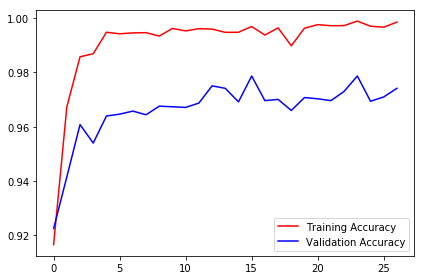

In [26]:
plt.plot(training_acc_list,'r', label='Training Accuracy')
plt.plot(val_acc_list, 'b', label='Validation Accuracy')
#plt.set_ylim([0, 1.0])
#plt.set_xlim([0, EPOCHS])
plt.legend(loc=4)
plt.tight_layout()
plt.show()

---

## Step 3: Test a Model on New Images

I searched images from traffic signal images from internet and tried to classify those using the generated model.

### Load and Output the Images

In [27]:
### Load the images and plot them here.
newTestImages = []
newTestLabel = []
newTestImages.append("stop.jpg")
newTestImages.append("priority_road_traffic_sign.jpg")
newTestImages.append("RoadWorks1.jpg")
newTestImages.append("keepRight.jpg")
newTestImages.append("noEntry.jpg")
newTestImages.append("speed20.jpg")

newTestLabel.append(14) 
newTestLabel.append(12)
newTestLabel.append(25)
newTestLabel.append(38)
newTestLabel.append(17)
newTestLabel.append(0)

X_newTestImages = np.empty([6,32,32,3],dtype=np.uint8)
X_newTestLabel = np.empty([6,],dtype=np.uint8)
for i in range(len(newTestImages)):
    im = cv2.imread(newTestImages[i])
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = cv2.resize(im,(32,32), interpolation = cv2.INTER_AREA)
    X_newTestImages[i,:,:,:] = im
    X_newTestLabel[i] = newTestLabel[i]




In [28]:
# Preprocess New Test images
preprocessed_newX_test = np.empty(shape=X_newTestImages.shape,dtype=np.float32)

numOfnewTestImg,height,width,channels = X_newTestImages.shape
gray_newX_test = np.empty([numOfnewTestImg,height,width,1],dtype=np.float32)

for i in range(numOfnewTestImg):
       preprocessed_newX_test[i,:,:,:] =   pre_process_image(X_newTestImages[i])
        
gray_newX_test[:,:,:,0]= preprocessBatch(preprocessed_newX_test)

print("Shape of New Test image batch before preprocessing:",X_newTestImages.shape)
print("Preprocessing complete for New Test images." )
print("Shape of New test image batch after preprocessing:",gray_newX_test.shape)

Shape of New Test image batch before preprocessing: (6, 32, 32, 3)
Preprocessing complete for New Test images.
Shape of New test image batch after preprocessing: (6, 32, 32, 1)


### Predict the Sign Type for Each Image

In [29]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_test_accuracy = evaluate(gray_newX_test, X_newTestLabel)

### Analyze Performance

In [30]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("New Test Data Accuracy = {:.3f}".format(new_test_accuracy))

New Test Data Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [31]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
pred = tf.nn.top_k(y_pred,k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    feed_dict = {x: gray_newX_test, y: X_newTestLabel,keep_prob:1}
    top_5_pred = sess.run(pred, feed_dict=feed_dict)

In [32]:
print(top_5_pred.values)
print(top_5_pred.indices)

[[  1.00000000e+00   1.55981006e-09   1.22185873e-10   6.00742936e-12
    4.01790276e-12]
 [  9.99999642e-01   3.87893323e-07   1.05182365e-11   6.20947131e-12
    1.34225736e-12]
 [  9.99892950e-01   1.00243065e-04   6.77566959e-06   3.08463921e-10
    1.44252596e-11]
 [  1.00000000e+00   1.56820294e-26   5.06239198e-27   1.81533342e-27
    2.38121632e-29]
 [  1.00000000e+00   1.26321147e-16   1.23479092e-18   7.32742901e-19
    1.57271346e-19]
 [  6.73578978e-01   2.98823595e-01   1.17958663e-02   1.17691010e-02
    2.62558041e-03]]
[[14 13 33 12 39]
 [12 15 17 14  4]
 [25 18 39 11 27]
 [38 31 11 12 13]
 [17  4  5 38 14]
 [ 1 28 18 40  0]]


### New Test Data Classification Result Visualization

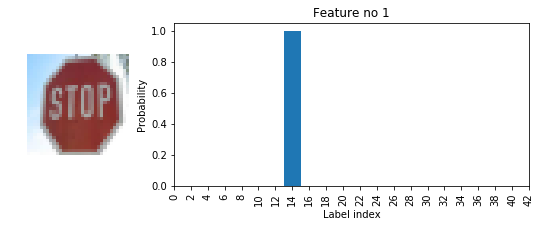

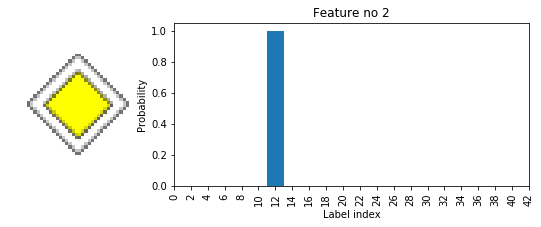

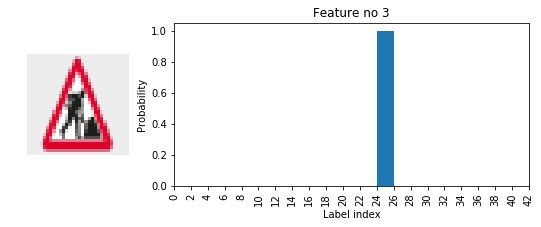

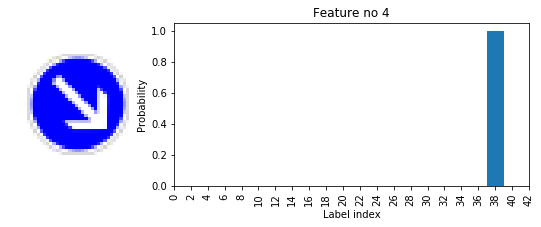

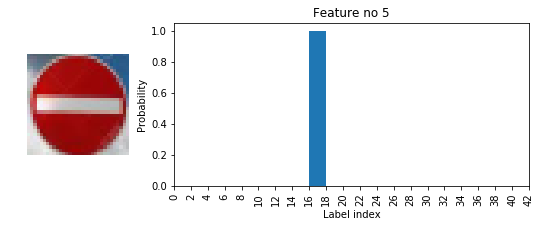

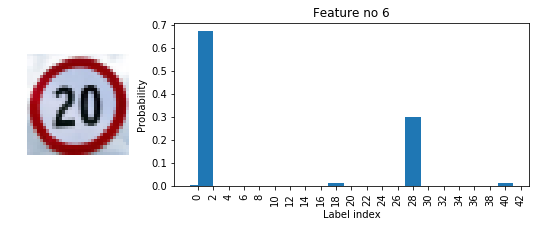

In [49]:
plt.figure(figsize = (11,8))
for i in range(6):
    plt.figure(figsize = (9,3))
    gs = gridspec.GridSpec(1, 2,width_ratios=[2,7])
    plt.subplot(gs[0])
    plt.imshow(X_newTestImages[i])
    plt.axis('off')
    plt.subplot(gs[1])
    plt.bar(top_5_pred[1][i], top_5_pred[0][i], align="center", width = 2)
    plt.xticks(np.arange(0,44,2),rotation=90)
    #plt.yticks(["aa","ab","ac","ad","ae"],rotation='vertical')
    #plt.yticks
    plt.title("Feature no %d" %(i+1))
    plt.ylabel("Probability")
    plt.xlabel("Label index")
    plt.show();

# Test Data prediction Explaination


The model is mostly certain and gives correct probablity but it sometimes get confused with similar looking images like Speed limit20 and Speed limit30.   

**Analysis of Individual new Test images**

1.  The stop sign image(image 1) is easy one. Though it is at some angle.
2. Images 2,3,4 can be considered as easy ones as they are well centred and quite prominent.
3. Speed limit 20 image is a bit difficult one, since the background of image and signboard is quite similar.


In [50]:
data_pd = pd.read_csv('signnames.csv')

In [51]:

data_pd

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing
